Step 1: Load Necessary Libraries and Dependencies

In [1]:
# Install required packages
!apt-get -qq install xxd
!pip install pandas numpy matplotlib tensorflow

# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

Step 2: Apply data augmentation to the original data Load and Visualize IMU Data

<ipython-input-3-8ebdd234f4de>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-3-8ebdd234f4de>:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-3-8ebdd234f4de>:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


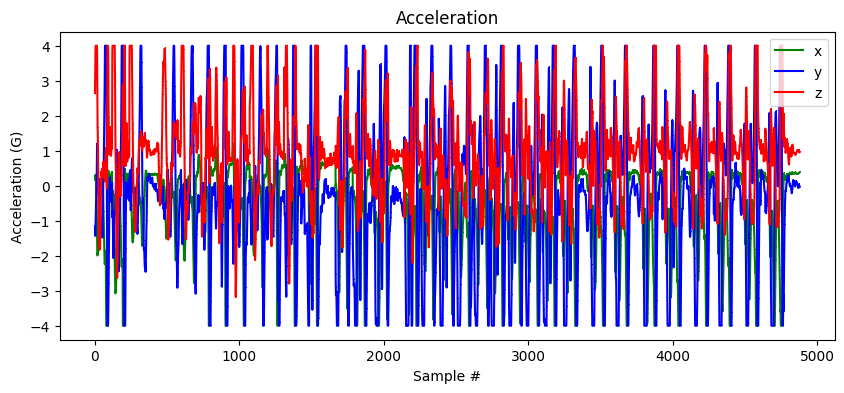

<ipython-input-3-8ebdd234f4de>:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df_augmented['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-3-8ebdd234f4de>:46: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df_augmented['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-3-8ebdd234f4de>:47: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df_augmented['aZ'], 'r.', label='z', linestyle='solid', marker=',')


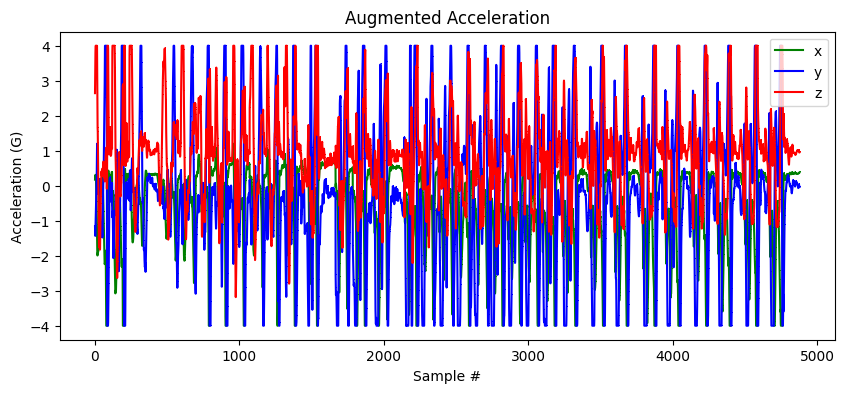

<ipython-input-3-8ebdd234f4de>:66: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-3-8ebdd234f4de>:67: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-3-8ebdd234f4de>:68: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


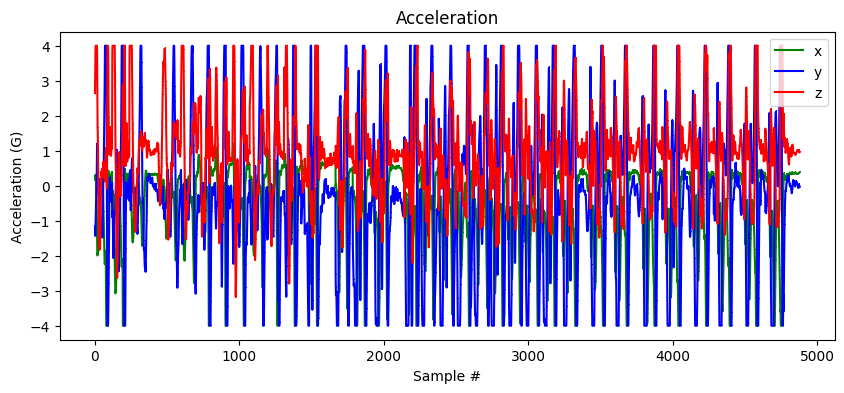

<ipython-input-3-8ebdd234f4de>:76: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-3-8ebdd234f4de>:77: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-3-8ebdd234f4de>:78: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


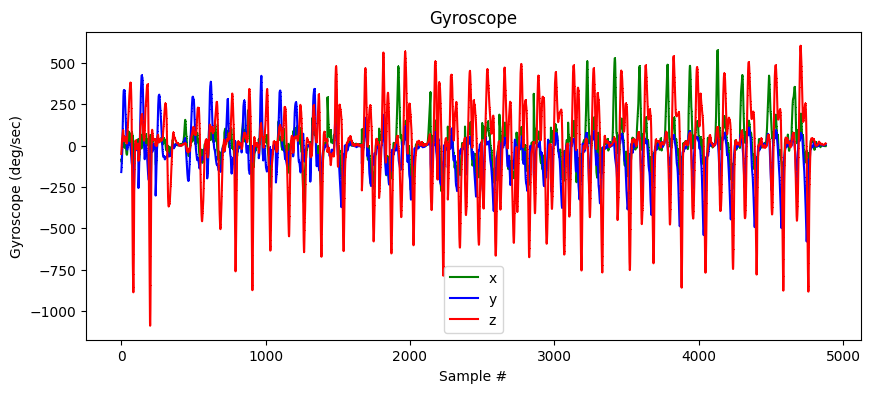

In [3]:
# Import necessary libraries for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the filename
filename = "locomotor.csv"

# Load the data
df = pd.read_csv("data/" + filename)

# Data Augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for points outside the input
)

# Visualize original Acceleration
index = range(1, len(df['aX']) + 1)
plt.rcParams["figure.figsize"] = (10, 4)
plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

# Apply data augmentation to the original data
augmented_data = []
for i in range(len(df)):
    sample = df.iloc[i:i+1].values  # Extract one sample as a 2D array
    sample = sample.reshape((1, sample.shape[0], sample.shape[1]))  # Reshape to 3D array
    augmented_sample = datagen.random_transform(sample)  # Apply data augmentation
    augmented_data.append(augmented_sample[0])  # Reshape back to 2D array and append

# Convert the augmented data to DataFrame
df_augmented = pd.DataFrame(np.vstack(augmented_data), columns=df.columns)

# Visualize augmented Acceleration
plt.rcParams["figure.figsize"] = (10, 4)
plt.plot(index, df_augmented['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df_augmented['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df_augmented['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Augmented Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()


# Define the filename
filename = "locomotor.csv"

# Load the data
df = pd.read_csv("data/" + filename)

# Visualize Acceleration
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (10, 4)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

# Visualize Gyroscope
plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


Step 3: Prepare Data for Training

In [8]:
# Define gestures and their corresponding labels
GESTURES = ["alohomora", "avadakedavra", "locomotor", "revelio", "arrestomomentum"]
SAMPLES_PER_GESTURE = 119
NUM_GESTURES = len(GESTURES)
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

# Initialize input and output lists
inputs = []
outputs = []

# Process each gesture file
for gesture_index in range(NUM_GESTURES):
    gesture = GESTURES[gesture_index]
    output = ONE_HOT_ENCODED_GESTURES[gesture_index]

    # Load data from the gesture file
    df = pd.read_csv("data/" + gesture + ".csv")

    # Calculate the number of recordings in the file
    num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

    # Process each recording
    for i in range(num_recordings):
        tensor = []
        for j in range(SAMPLES_PER_GESTURE):
            index = i * SAMPLES_PER_GESTURE + j
            tensor += [
                (df['aX'][index] + 4) / 8,
                (df['aY'][index] + 4) / 8,
                (df['aZ'][index] + 4) / 8,
                (df['gX'][index] + 2000) / 4000,
                (df['gY'][index] + 2000) / 4000,
                (df['gZ'][index] + 2000) / 4000
            ]

        inputs.append(tensor)
        outputs.append(output)

# Convert lists to numpy arrays
inputs = np.array(inputs, dtype='float32')
outputs = np.array(outputs, dtype='float32')


Step 4: Randomize and Split Data

In [9]:
# Randomize the order of the inputs
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Shuffle inputs and outputs
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the data into training, testing, and validation sets
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])


Step 5: Build and Train the Model

In [10]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mae'])

# Train the model
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

# Display model summary
print(model.summary())


Epoch 1/600
162/162 [==============================] - 1s 2ms/step - loss: 1.6489 - mae: 0.3116 - val_loss: 1.4708 - val_mae: 0.3010
Epoch 2/600
162/162 [==============================] - 0s 2ms/step - loss: 1.4377 - mae: 0.2953 - val_loss: 1.3865 - val_mae: 0.2893
Epoch 3/600
162/162 [==============================] - 0s 2ms/step - loss: 1.3422 - mae: 0.2825 - val_loss: 1.3943 - val_mae: 0.2876
Epoch 4/600
162/162 [==============================] - 0s 2ms/step - loss: 1.2964 - mae: 0.2720 - val_loss: 1.3328 - val_mae: 0.2803
Epoch 5/600
162/162 [==============================] - 0s 2ms/step - loss: 1.1901 - mae: 0.2599 - val_loss: 1.5008 - val_mae: 0.2772
Epoch 6/600
162/162 [==============================] - 0s 2ms/step - loss: 1.0896 - mae: 0.2454 - val_loss: 1.1938 - val_mae: 0.2423
Epoch 7/600
162/162 [==============================] - 0s 2ms/step - loss: 1.1125 - mae: 0.2422 - val_loss: 1.1271 - val_mae: 0.2523
Epoch 8/600
162/162 [==============================] - 0s 2ms/step - 

**Step 6: Visualize Training **

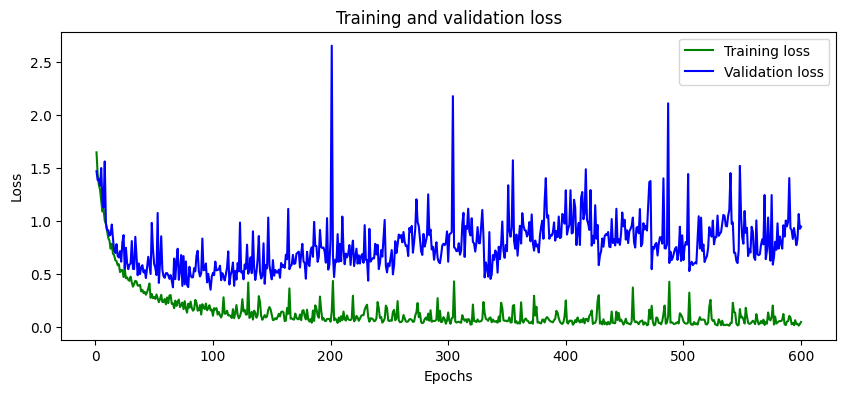

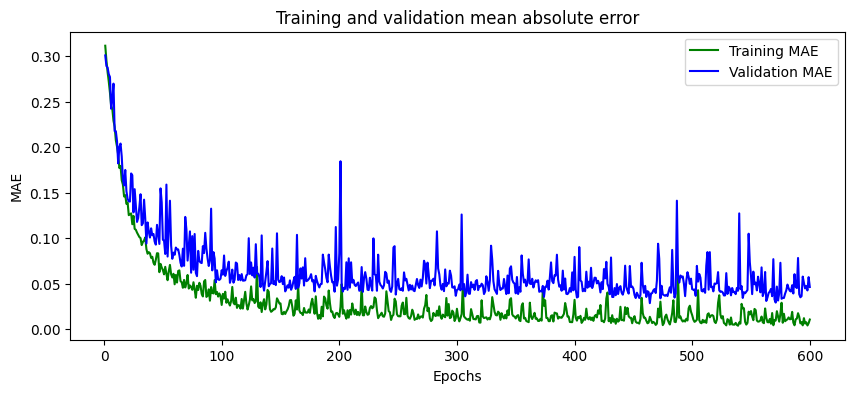

In [11]:
# Visualize training history
plt.rcParams["figure.figsize"] = (10, 4)

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g-', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MAE (Mean Absolute Error)
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[:], mae[:], 'g-', label='Training MAE')
plt.plot(epochs[:], val_mae[:], 'b-', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Step 7: Model Evaluation and Conversion to TensorFlow Lite

In [12]:
# Evaluate the model on the test set
predictions = model.predict(inputs_test)

# Print predictions and actual outputs
print("Predictions:\n", np.round(predictions, decimals=3))
print("Actual:\n", outputs_test)

# Convert the model to TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

# Display model size
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model size: %d bytes" % basic_model_size)

# Generate model.h header file
!echo "const unsigned char model[] = {" > model.h
!cat gesture_model.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

# Display header file size
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")


2/2 [==============================] - 0s 5ms/step
Predictions:
 [[0.962 0.    0.003 0.021 0.014]
 [0.    0.    1.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.992 0.    0.    0.008]
 [0.    0.    0.    0.967 0.033]
 [1.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.998 0.002]
 [0.987 0.    0.001 0.002 0.01 ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.063 0.    0.    0.937]
 [0.    0.    0.    0.    1.   ]
 [0.    0.    0.    0.998 0.002]
 [1.    0.    0.    0.    0.   ]
 [0.018 0.    0.    0.804 0.177]
 [0.    0.    0.001 0.853 0.147]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.331 0.655 0.013]
 [0.    0.    0.    0.999 0.001]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.999 0.001]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.31  0.67  0.02 ]
 [0.    0.    0.    0.999 0.001]
 [0.    0.981 0.    0.    0.019]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0. 

FLOPs (Floating Point Operations per Second): 0


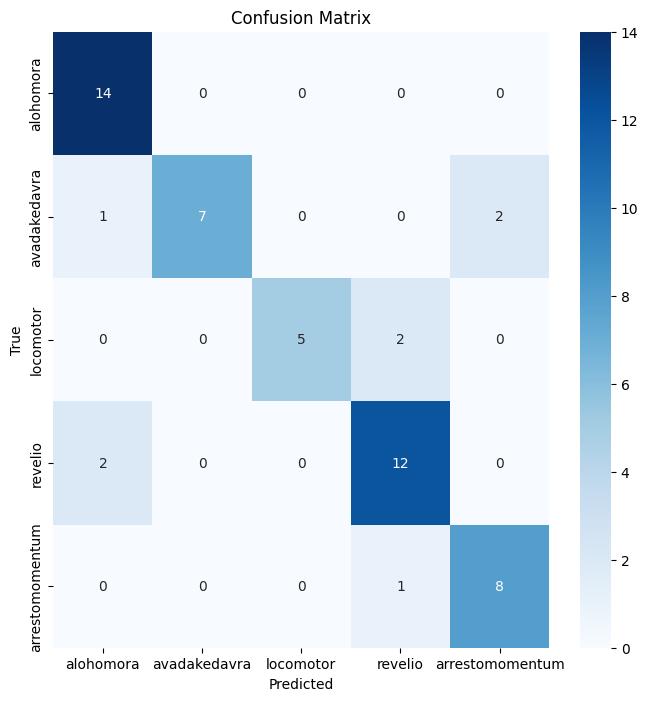

In [19]:
# Calculate and display FLOPs
def count_flops(model):
    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()

    # Optional: Print the number of flops for each op in the model
    flops = tf.compat.v1.profiler.profile(graph=tf.compat.v1.get_default_graph(), run_meta=run_meta, cmd='op', options=opts)
    print(f"FLOPs (Floating Point Operations per Second): {flops.total_float_ops}")

count_flops(model)


# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(outputs_test, axis=1)

conf_matrix = confusion_matrix(true_classes, predictions_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=GESTURES, yticklabels=GESTURES)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()